## Data Exploration and try-outs!

In [35]:
# dependencies
import os
import numpy as np
import pandas as pd
import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [36]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    if path and os.path.exists(path):
        i = Image.open(path)
        i.thumbnail((150, 150), Image.LANCZOS)
        return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def add_image_path(x):
    image_path = '../input/train/' + x
    if os.path.exists(image_path):
        path = os.path.join(image_path, os.listdir(image_path)[0])
        return path

In [37]:
kin_df = pd.read_csv('../input/train_relationships.csv')
kin_df = kin_df.sample(50)
kin_df.head()

,p1,p2
2131,F0610/MID3,F0610/MID5
1924,F0565/MID2,F0565/MID4
1387,F0393/MID2,F0393/MID6
3092,F0836/MID1,F0836/MID4
2103,F0601/MID5,F0601/MID6


In [38]:
kin_df['p1_path'] = kin_df.p1.apply(lambda x: add_image_path(x))
kin_df['p2_path'] = kin_df.p2.apply(lambda x: add_image_path(x))
kin_df['p1_thumb'] = kin_df.p1_path.map(lambda f: get_thumbnail(f))
kin_df['p2_thumb'] = kin_df.p2_path.map(lambda f: get_thumbnail(f))
kin_df.head()

,p1,p2,p1_path,p2_path,p1_thumb,p2_thumb
2131,F0610/MID3,F0610/MID5,../input/train/F0610/MID3/P06411_face3.jpg,../input/train/F0610/MID5/P06415_face1.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDEA7C898>,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDE9C3C50>
1924,F0565/MID2,F0565/MID4,../input/train/F0565/MID2/P05942_face2.jpg,../input/train/F0565/MID4/P05948_face1.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDEA7CCF8>,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDE9C3CF8>
1387,F0393/MID2,F0393/MID6,../input/train/F0393/MID2/P04153_face1.jpg,None,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDEA7CE10>,None
3092,F0836/MID1,F0836/MID4,../input/train/F0836/MID1/P08837_face2.jpg,../input/train/F0836/MID4/P08833_face4.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDEA7CEB8>,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDE9C3DA0>
2103,F0601/MID5,F0601/MID6,../input/train/F0601/MID5/P06284_face2.jpg,../input/train/F0601/MID6/P11982_face2.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDEA7CF60>,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7F2BDE9C3E48>


In [39]:
kin_df.dropna(inplace=True)

,p1,p2,p1_thumb,p2_thumb
2131,F0610/MID3,F0610/MID5,,
1924,F0565/MID2,F0565/MID4,,
3092,F0836/MID1,F0836/MID4,,
2103,F0601/MID5,F0601/MID6,,
90,F0023/MID3,F0023/MID5,,
776,F0211/MID1,F0211/MID5,,
1612,F0446/MID7,F0446/MID4,,
156,F0054/MID1,F0054/MID3,,
1171,F0334/MID1,F0334/MID2,,
1670,F0479/MID3,F0479/MID4,,

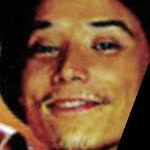
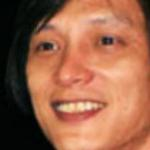
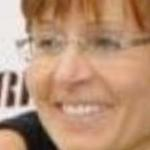
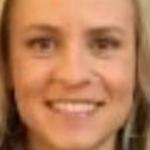
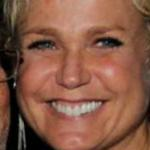
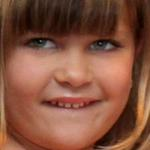
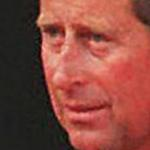
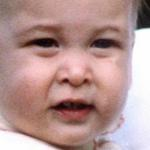
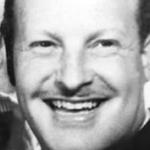
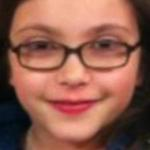
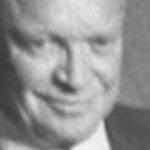
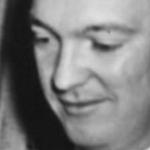
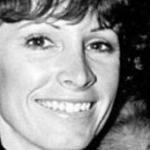
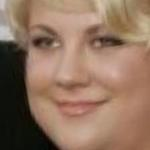
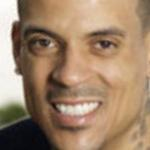
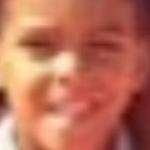
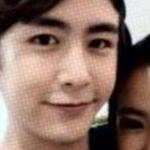
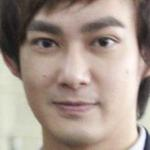
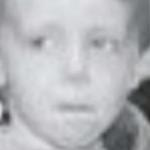
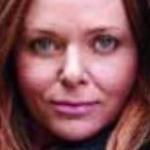
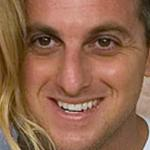
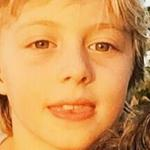
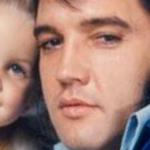
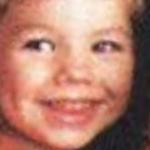
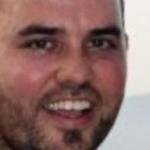
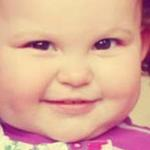
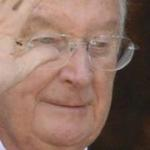
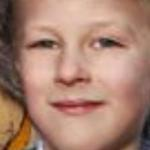
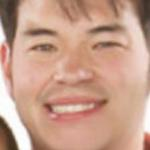
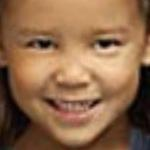
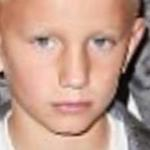
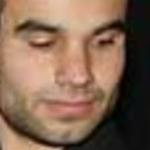
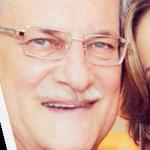
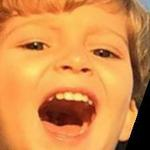
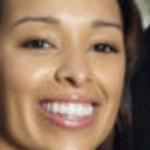
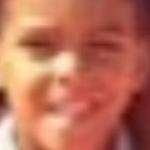
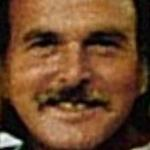
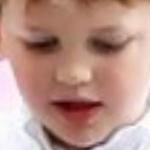
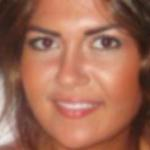
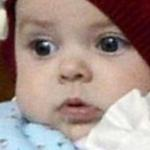
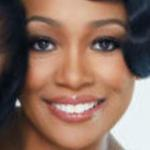
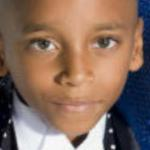
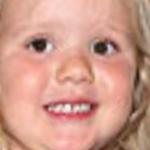
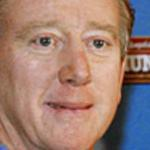
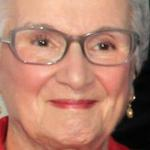
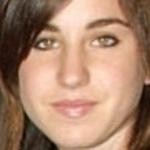
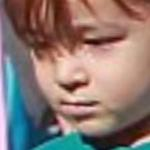
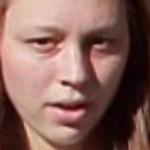
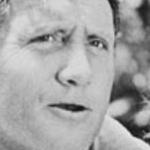
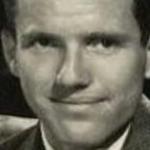
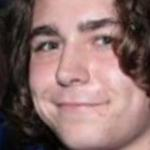
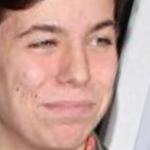
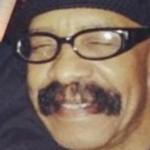
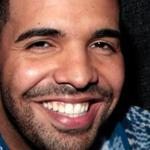
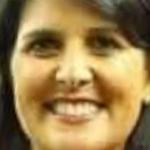
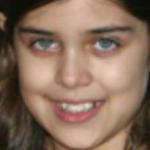
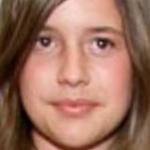
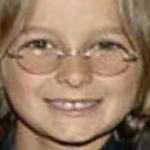
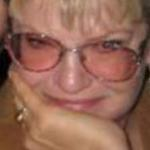
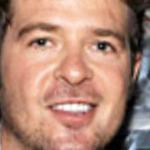
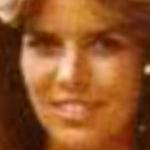
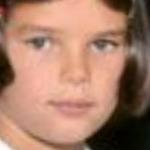
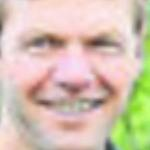
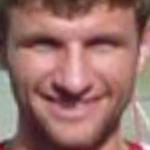
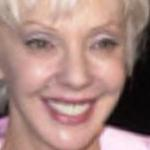
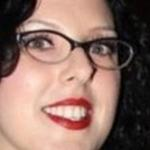
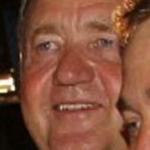
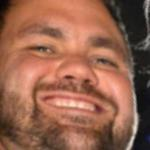
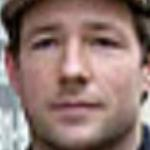
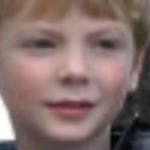
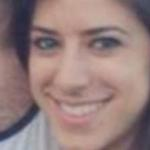
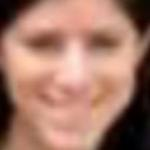
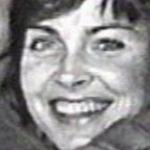
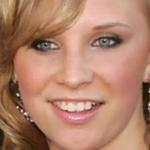
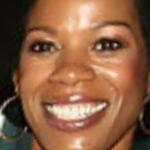
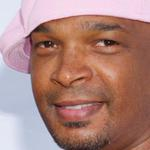
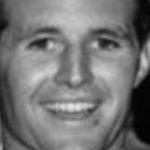
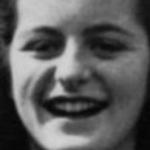
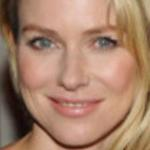
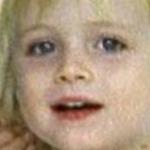
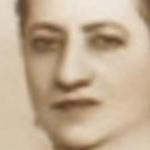
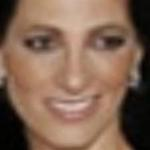
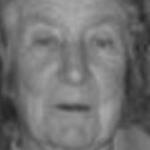
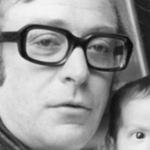
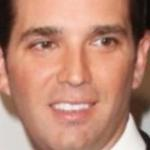
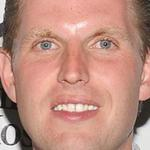
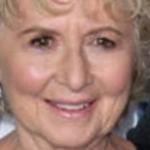
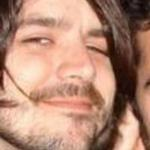

In [40]:
# displaying PIL.Image objects embedded in dataframe
HTML(kin_df[['p1', 'p2', 'p1_thumb', 'p2_thumb']].to_html(formatters={'p1_thumb': image_formatter, 'p2_thumb': image_formatter}, escape=False))

In [41]:
# display images specified by path
# HTML(kin_df[['p1', 'p2', 'p1_path', 'p2_path']].to_html(formatters={'p1_path': image_formatter, 'p2_path': image_formatter}, escape=False))